## algorithm design and anlysis-2025 spring  homework 3
**Deadline**：2025.5.14

**name**:


note：
---
1. 带有\*的题目，申请免上课的同学，必须完成，其他同学选作；
2. 请独立完成，如求助了他人或者大模型，请著明，并且不可省略算法分析部分；
4. 如若作答有雷同，全部取消成绩；
3. 需要书面作答的题目，可以通过引用图片的形式添加，但是注意上传项目时包含所引用的图片的源文件；
4. $log_n$ 默认表示$log_2{n}$;

## 问题 1  

请证明基于比较的排序算法计算复杂度下界为$\Omega(nlogn)$

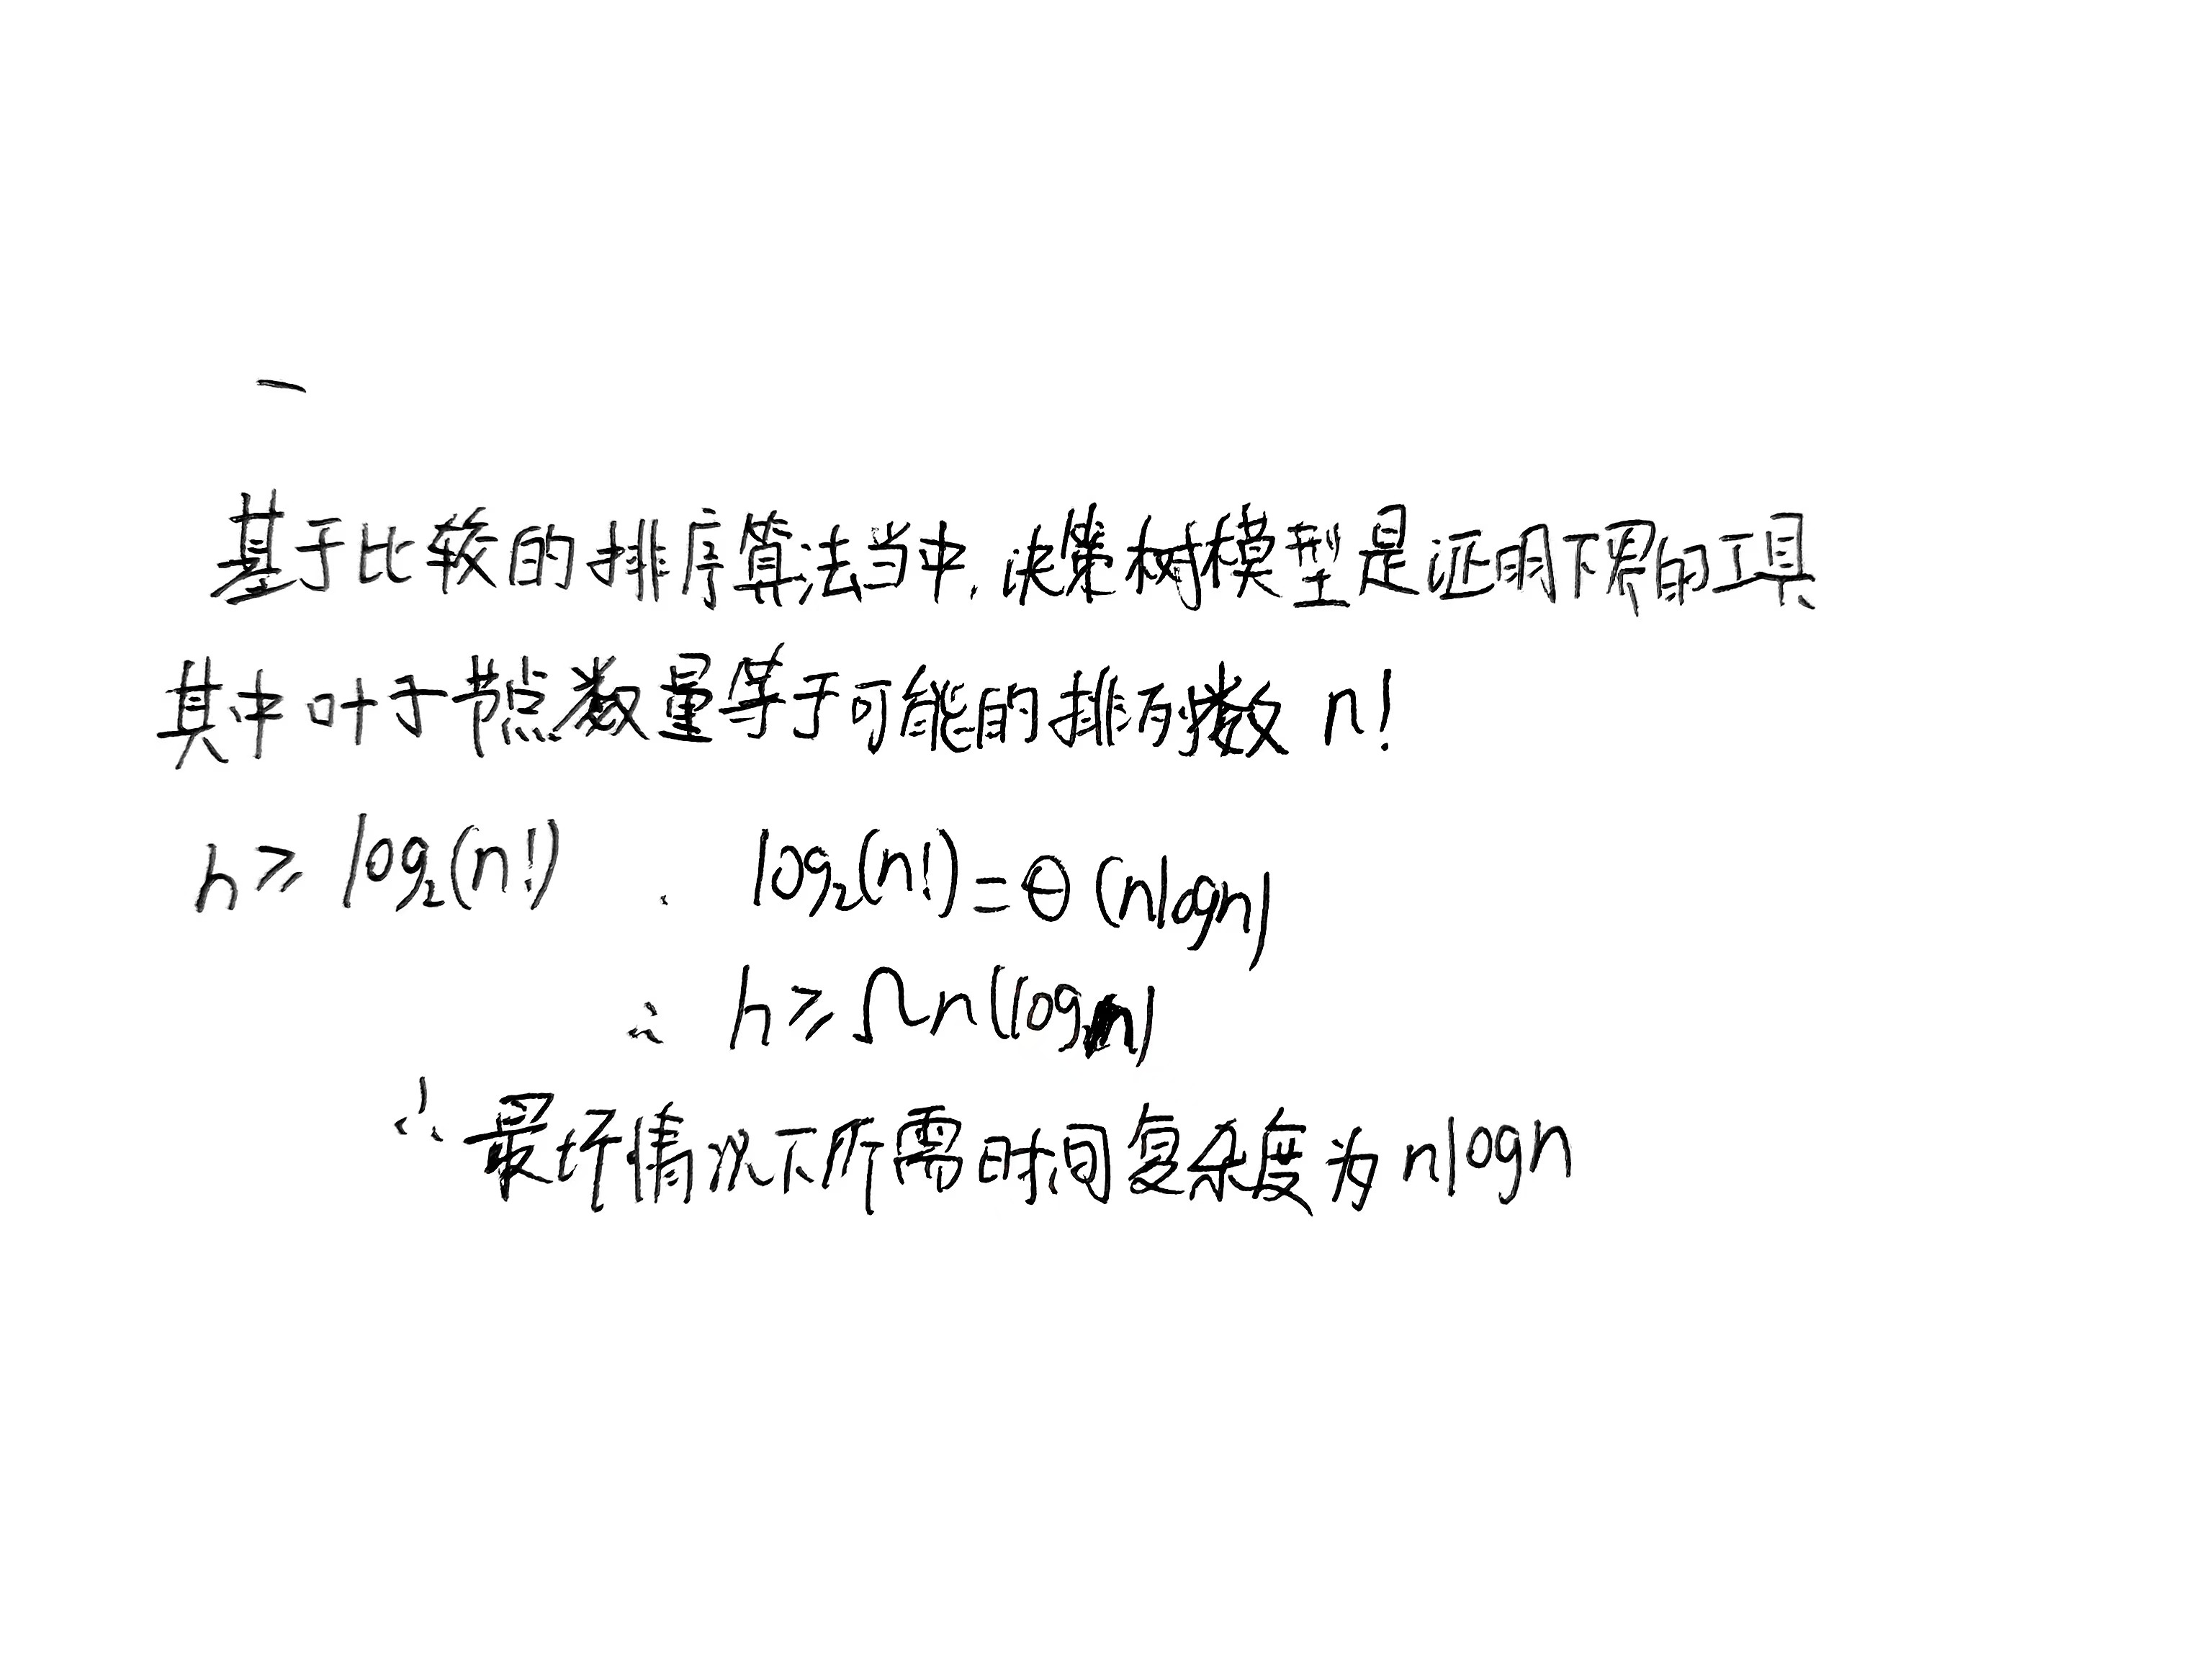

## 问题 2 

构建二叉搜索树

> 1. 给定一个数组 [48, 33, 49, 47, 42, 46, 32], 构建一个二叉搜索树存储这些数据，请**绘制**所构建的**二叉搜索树**（标明结点的值）。
> 2. 从第1问的二叉搜索树中删除33，请**绘制**删除33后的**二叉搜索树**（标明结点的值）

- 推荐使用graphviz包绘制树的结构

## 问题 3 

> 下面是九门课程的开始和结束时间:
>
> [(9:00,12:30), (11:00,14:00), (13:00, 14:30), (9:00,10:30),(13:00, 14:30),(14:00,16:30), (15:00,16:30), (15:00,16:30), (9:00,10:30)]
>
> 请使用贪婪算法为这九门课分配教室，要求在同一天内安排这些课，并且每个教室同一时间只能安排一门课。

**请问最少需要几间教室，罗列出每个教室安排的课程**

idea：这是一个区间调度问题，具体是最小教室分配问题，需要在同一天为九门课程分配教室，使得同一时间段没有课程冲突，并且使用最少的教室。可以使用贪心算法。一个课程的开始时间早于另一个课程的结束时间。就判定为冲突，对与每个课程而言：先遍历现有教室，判断是否可以将课程分配到该教室。如果找到可用的教室，将课程加入；否则，创建新教室并加入课程。这样最终教室的数量就是我们要的最小教室数量

In [1]:
def convert_to_minutes(time_str):
    """将时间字符串（如 '9:00'）转换为分钟数"""
    h, m = map(int, time_str.split(':'))
    return h * 60 + m

def format_time(minutes):
    """将分钟数转换为时间字符串（如 '09:00'）"""
    h, m = divmod(minutes, 60)
    return f"{h:02d}:{m:02d}"

def schedule_classrooms(course_times):
    """为课程分配教室，返回教室安排"""
    # 转换为分钟并保留原始索引
    courses_with_index = [
        (convert_to_minutes(start), convert_to_minutes(end), i + 1)
        for i, (start, end) in enumerate(course_times)
    ]
    
    # 按开始时间排序，开始时间相同则按结束时间排序
    courses_with_index.sort(key=lambda x: (x[0], x[1]))
    
    # 教室列表，每个教室存储 (结束时间, 课程索引) 的列表
    rooms = []
    
    for start, end, course_id in courses_with_index:
        # 寻找可用的教室（结束时间 <= 当前课程开始时间）
        assigned = False
        for room in rooms:
            if room[-1][0] <= start:  # 最后一个课程的结束时间 <= 新课程开始时间
                room.append((end, course_id))
                assigned = True
                break
        if not assigned:
            # 开辟新教室
            rooms.append([(end, course_id)])
    
    return rooms

# 输入课程时间
courses = [
    ("9:00", "12:30"), ("11:00", "14:00"), ("13:00", "14:30"),
    ("9:00", "10:30"), ("13:00", "14:30"), ("14:00", "16:30"),
    ("15:00", "16:30"), ("15:00", "16:30"), ("9:00", "10:30")
]

# 分配教室
assigned_rooms = schedule_classrooms(courses)

# 输出结果
print(f"最少需要 {len(assigned_rooms)} 间教室")
for i, room in enumerate(assigned_rooms, 1):
    print(f"教室 {i}:")
    for end_time, course_id in room:
        start_time = next(
            start for start, end, idx in [
                (convert_to_minutes(s), convert_to_minutes(e), i + 1)
                for i, (s, e) in enumerate(courses)
            ] if idx == course_id
        )
        print(f"  课程 {course_id}: {format_time(start_time)} - {format_time(end_time)}")

最少需要 3 间教室
教室 1:
  课程 4: 09:00 - 10:30
  课程 2: 11:00 - 14:00
  课程 6: 14:00 - 16:30
教室 2:
  课程 9: 09:00 - 10:30
  课程 3: 13:00 - 14:30
  课程 7: 15:00 - 16:30
教室 3:
  课程 1: 09:00 - 12:30
  课程 5: 13:00 - 14:30
  课程 8: 15:00 - 16:30


## 问题 4 

> 爬楼梯问题：假设爬楼梯时你每次只能爬一阶或者爬两阶，问爬上n阶的楼梯，你一共有多少种方法

请设计算法完成该问题，分析算法设计思路，计算时间复杂度，并基于python编程实现

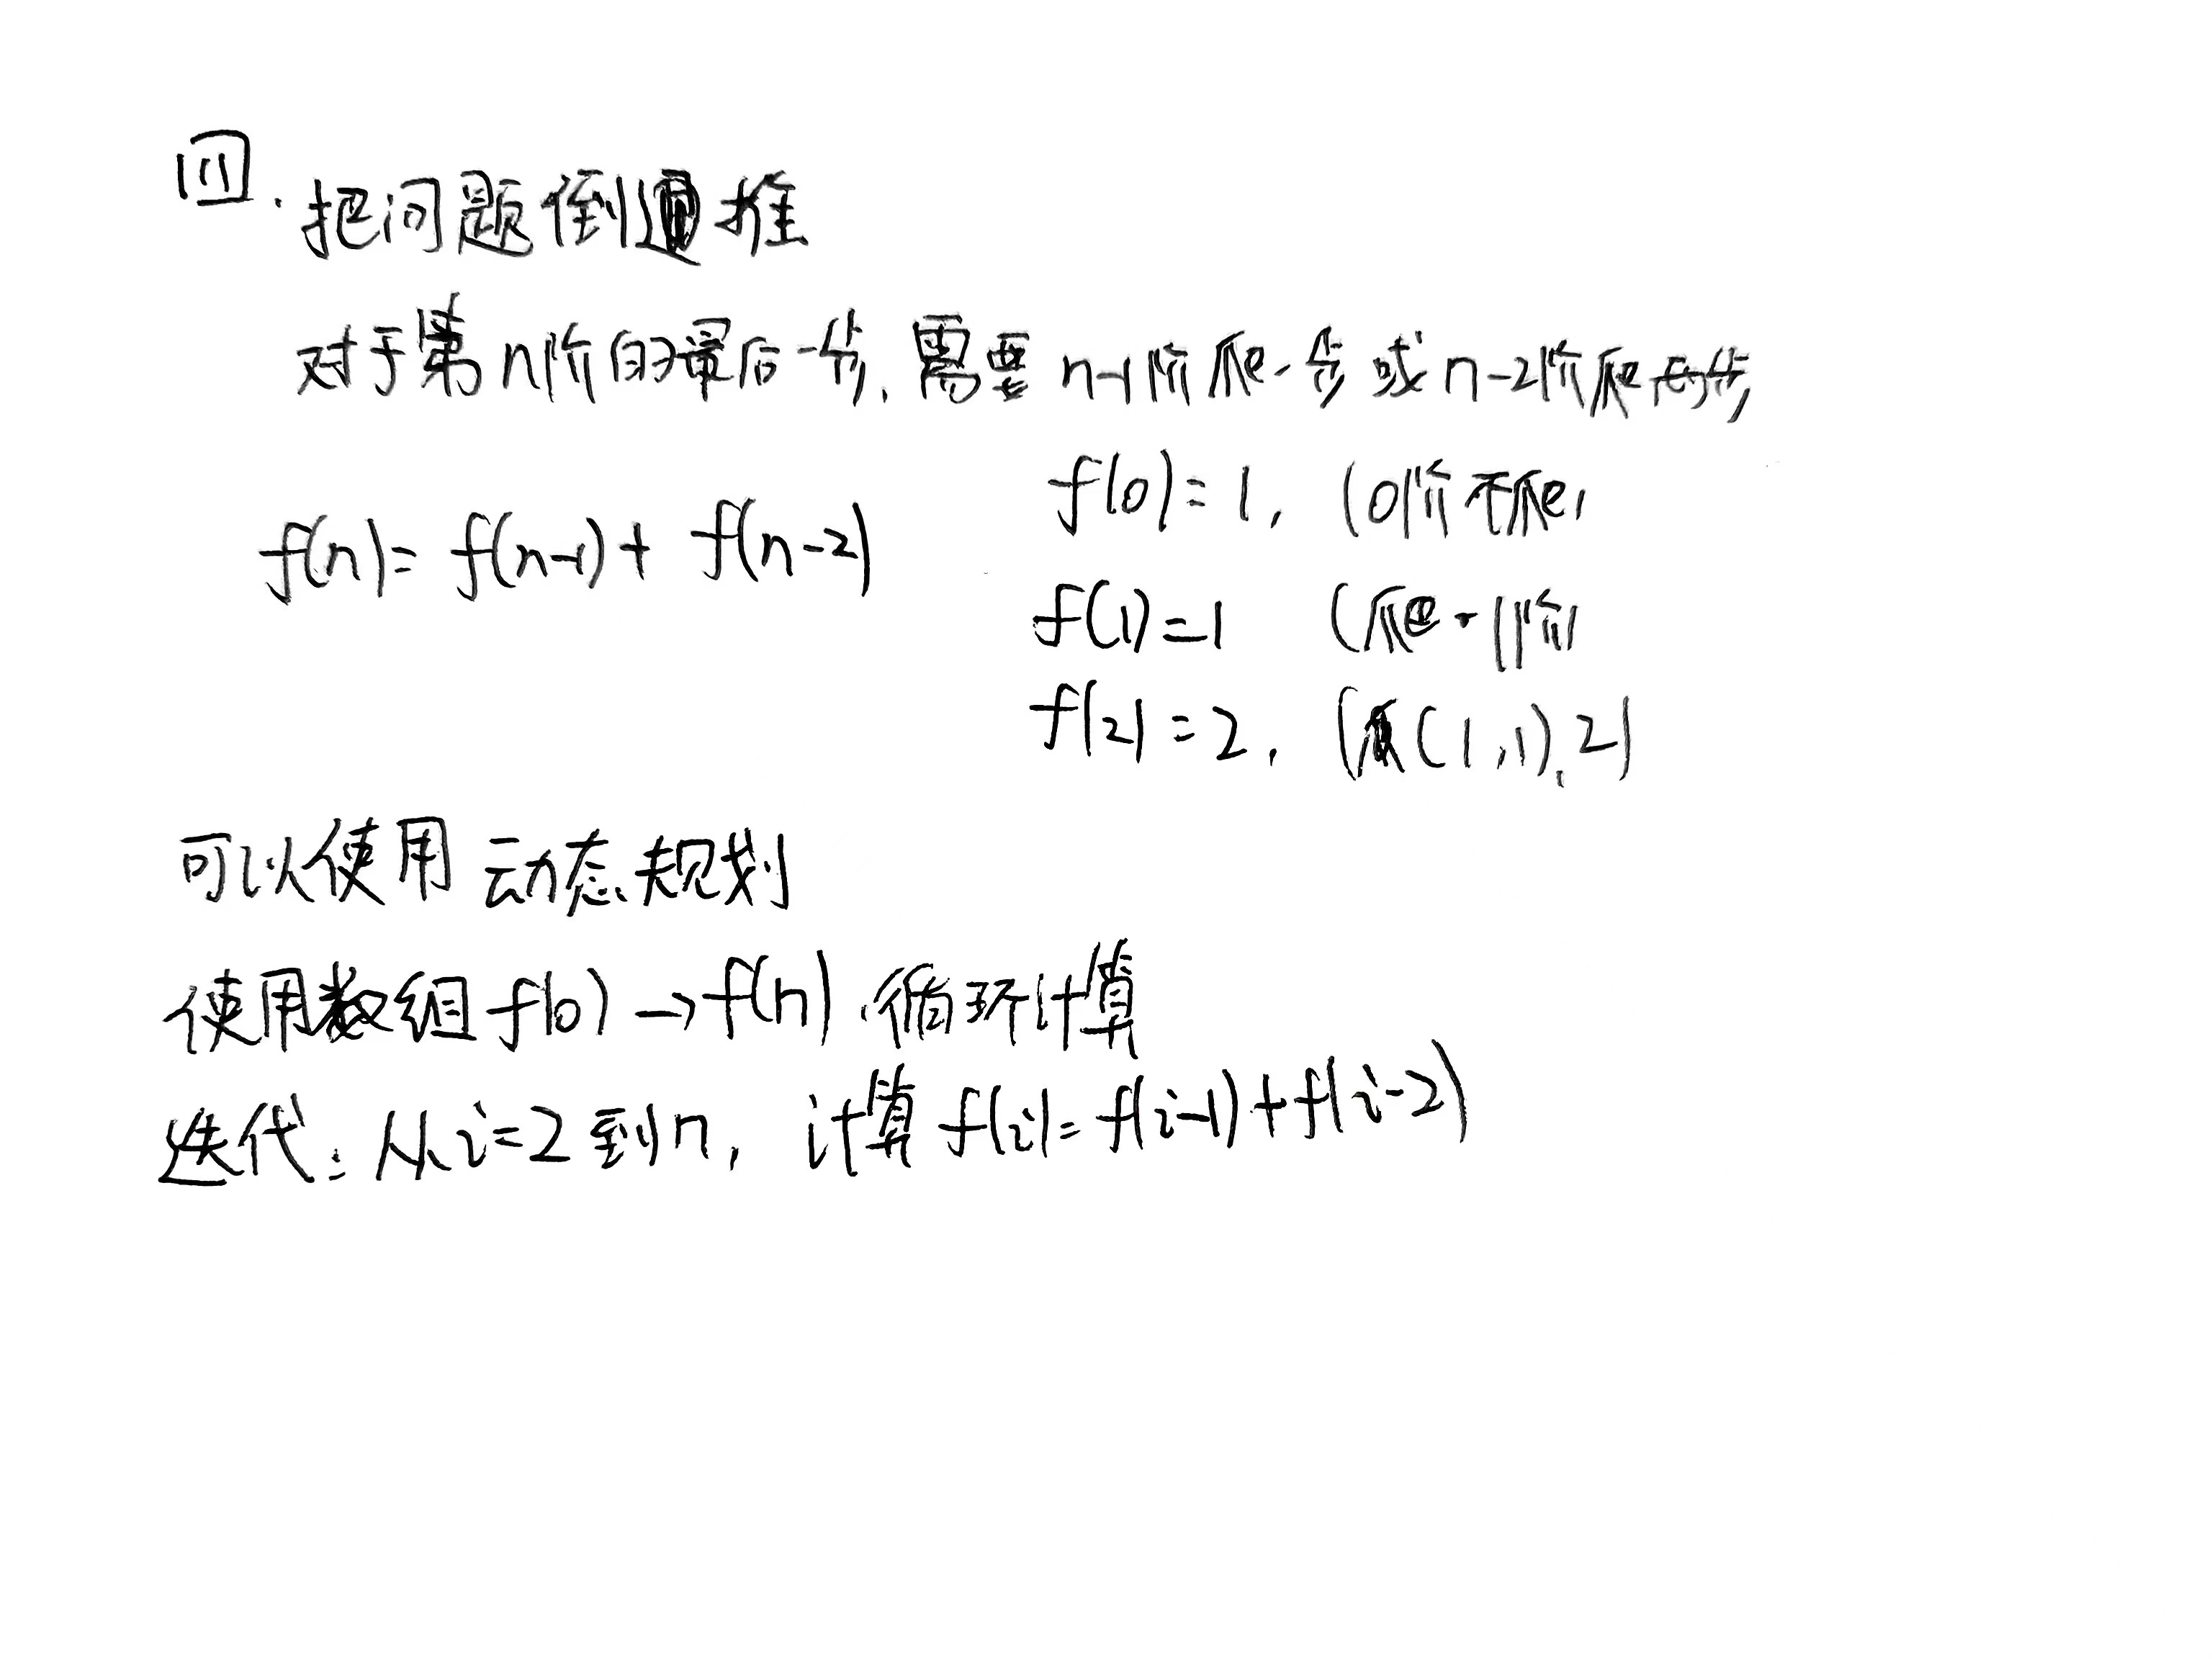

In [3]:
def ways_to_climb(stairs):
    """Calculate the number of ways to climb stairs with 1 or 2 steps."""
    # Handle base cases
    if stairs == 0:
        return 1
    if stairs == 1:
        return 1
    if stairs < 0:
        return 0
    
    # Initialize DP array for storing ways to climb i stairs
    dp = [0] * (stairs + 1)
    dp[0] = 1  # 0 stairs: 1 way (do nothing)
    dp[1] = 1  # 1 stair: 1 way (1 step)
    
    # Fill DP array using recurrence relation
    for step in range(2, stairs + 1):
        dp[step] = dp[step - 1] + dp[step - 2]
    
    return dp[stairs]

# Test cases
test_inputs = [2, 3, 4, 10]
for n in test_inputs:
    result = ways_to_climb(n)
    print(f"{result}")

2
3
5
89


## 问题 5 

> 0-1背包问题：现在有4块大理石，每个大理石对应的重量和价值使用一个元组表示, 即（重量，价值），4块大理石的重量和价值为：[(5,10), (4,40), (6,30), (3, 50)], 假设你有一辆最大承重为9的小推车，请问使用这个小推车装大理石的最大价值为多少

请设计一个算法解决该问题，分析算法设计思路，计算时间复杂度，并基于python编程实现

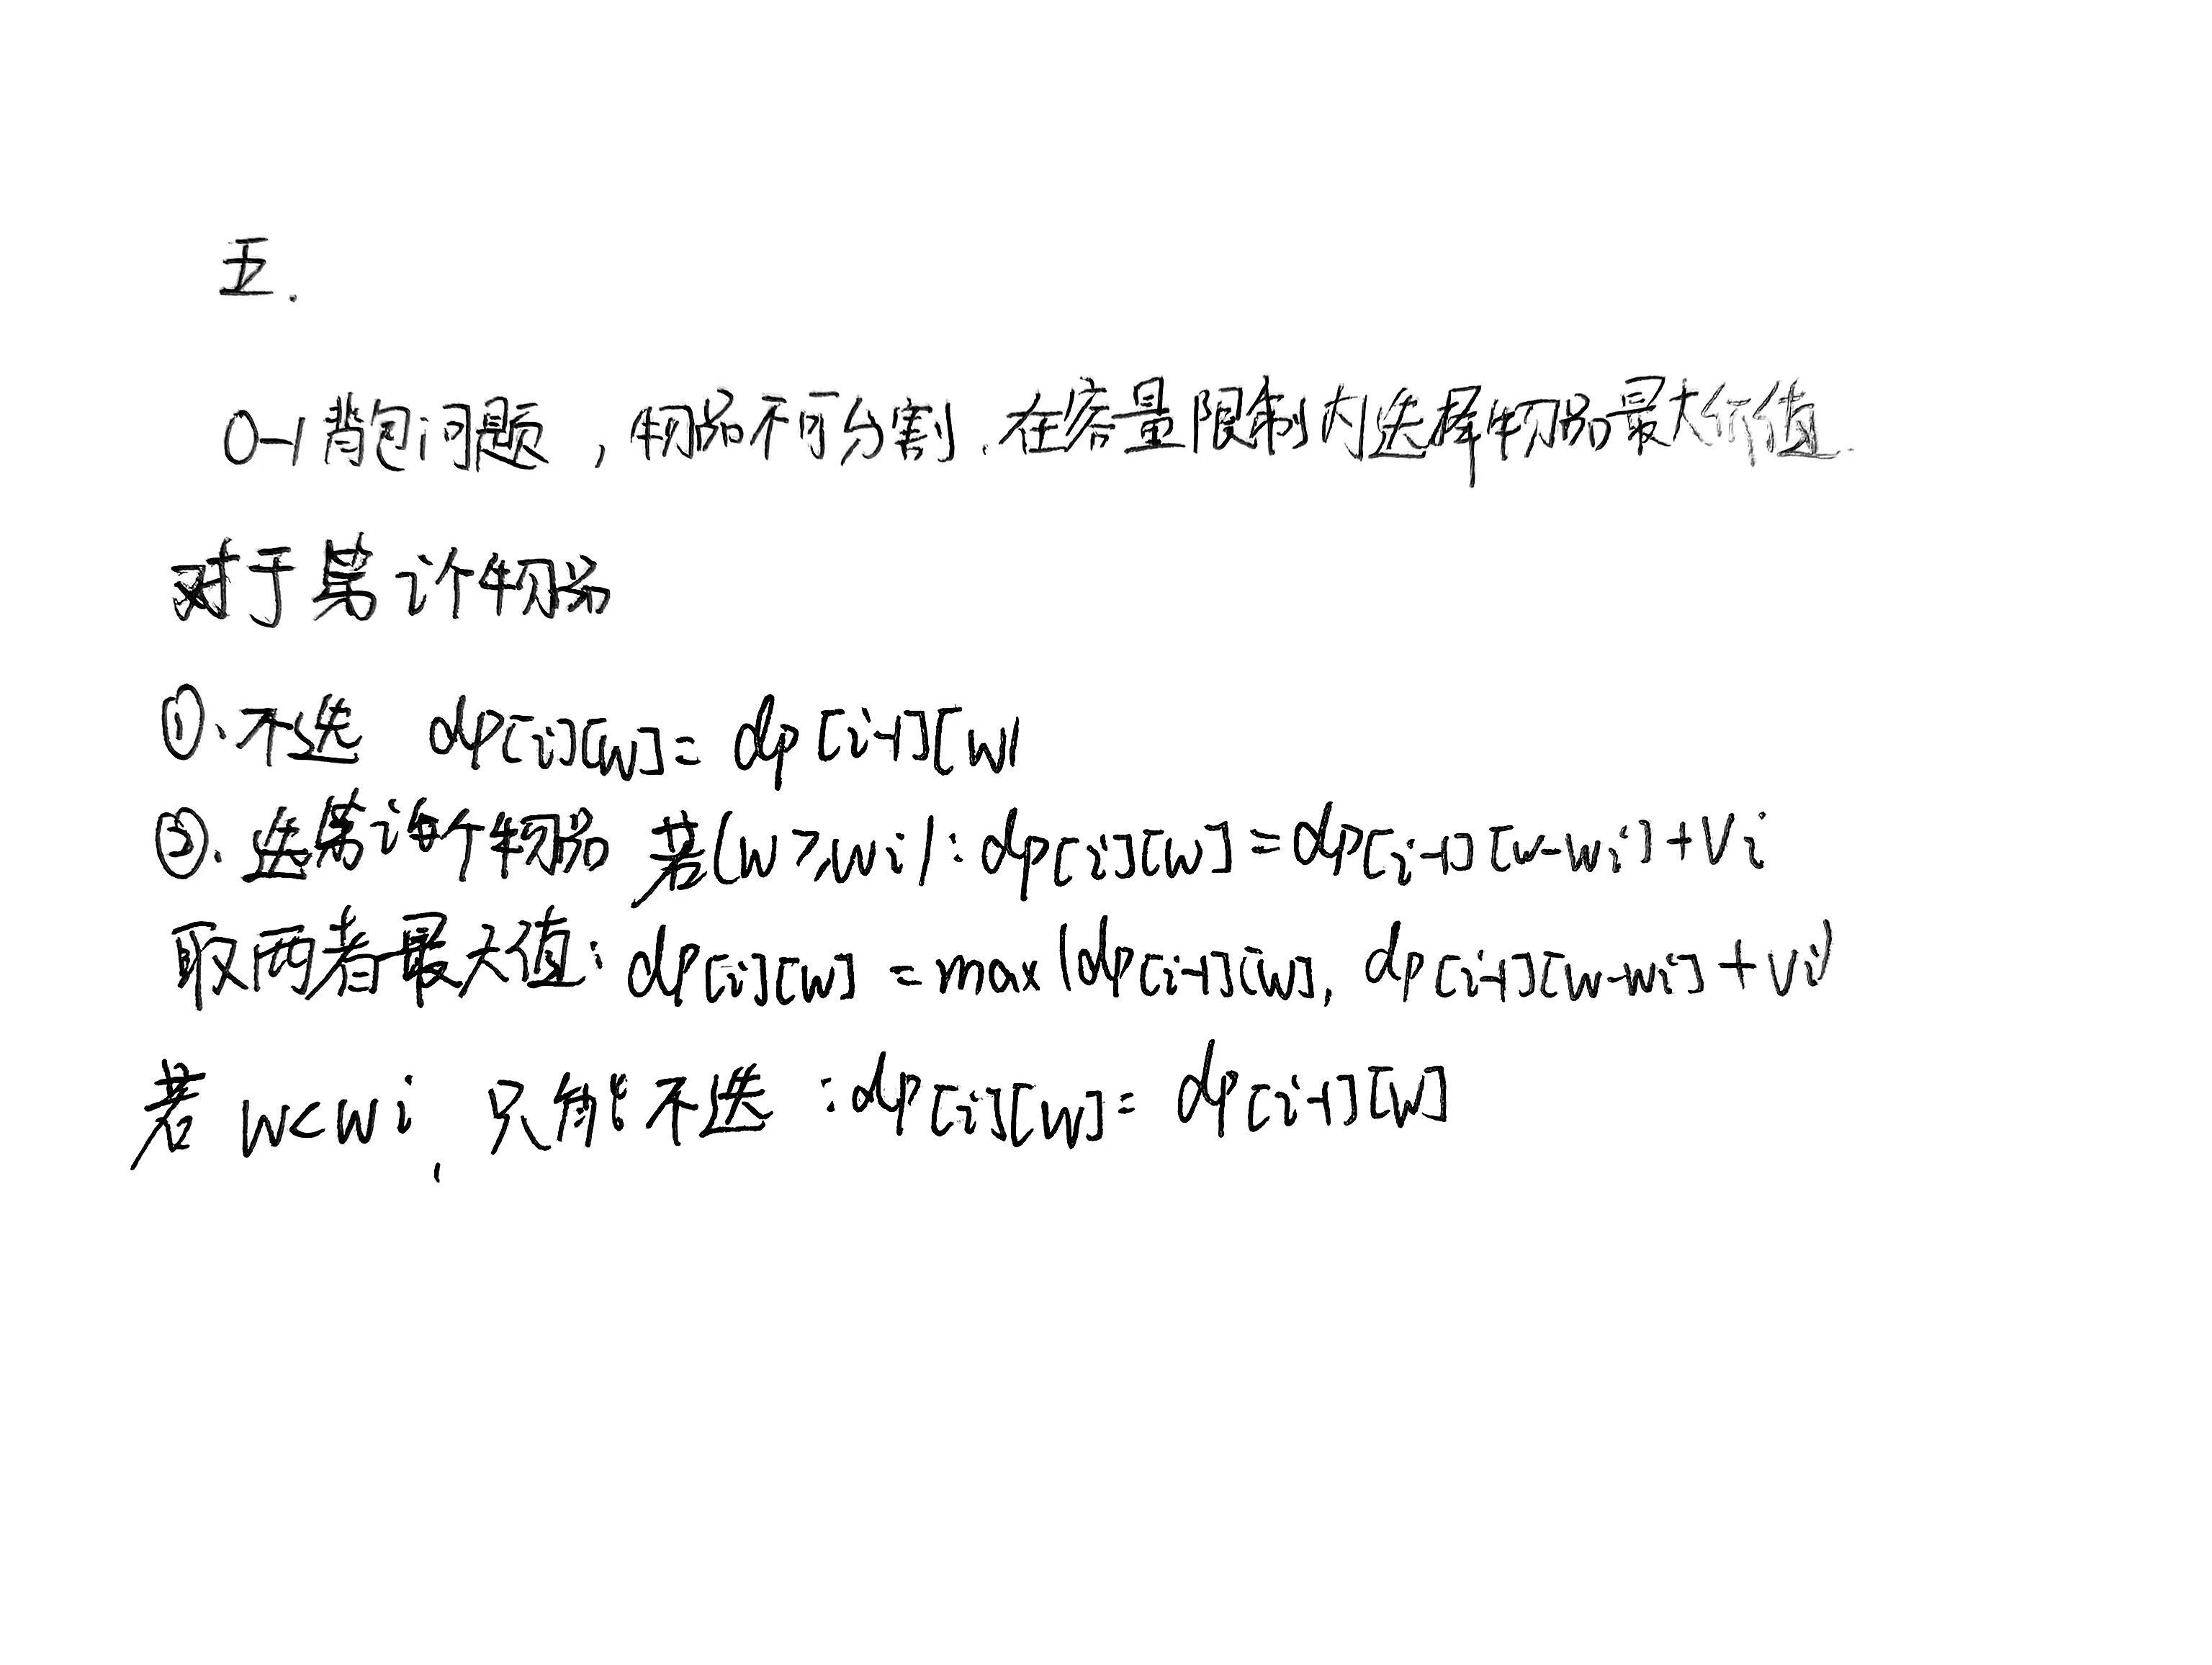

In [5]:
def backpack_max_value(goods, limit):
    n = len(goods)
    # 初始化记忆化缓存
    memo = [[-1] * (limit + 1) for _ in range(n)]
    def dp(index, capacity):

        if index < 0 or capacity <= 0:
            return 0
        if memo[index][capacity] != -1:
            return memo[index][capacity]
        
        weight, value = goods[index]
        # 不选当前物品
        result = dp(index - 1, capacity)
        # 选当前物品（如果容量足够）
        if weight <= capacity:
            result = max(result, dp(index - 1, capacity - weight) + value)
        
        memo[index][capacity] = result
        return result
    
    return dp(n - 1, limit)

# 输入数据
items = [(5, 10), (4, 40), (6, 30), (3, 50)]  # (重量, 价值)
W = 9  # 最大承重

# 计算最大价值
max_value = backpack_max_value(items, W)
print(f"Maximum value: {max_value}")  

Maximum value: 90


## 问题 6 
给定 `n` 个非负整数表示每个宽度为 `1` 的柱子的高度图，计算按此排列的柱子，下雨之后能接多少雨水。



<div style="text-align:center;width:800px;"> <img alt="" src="./fig/hw3q6.png"> </div>

请分析算法设计思路，计算时间复杂度，并基于python编程实现

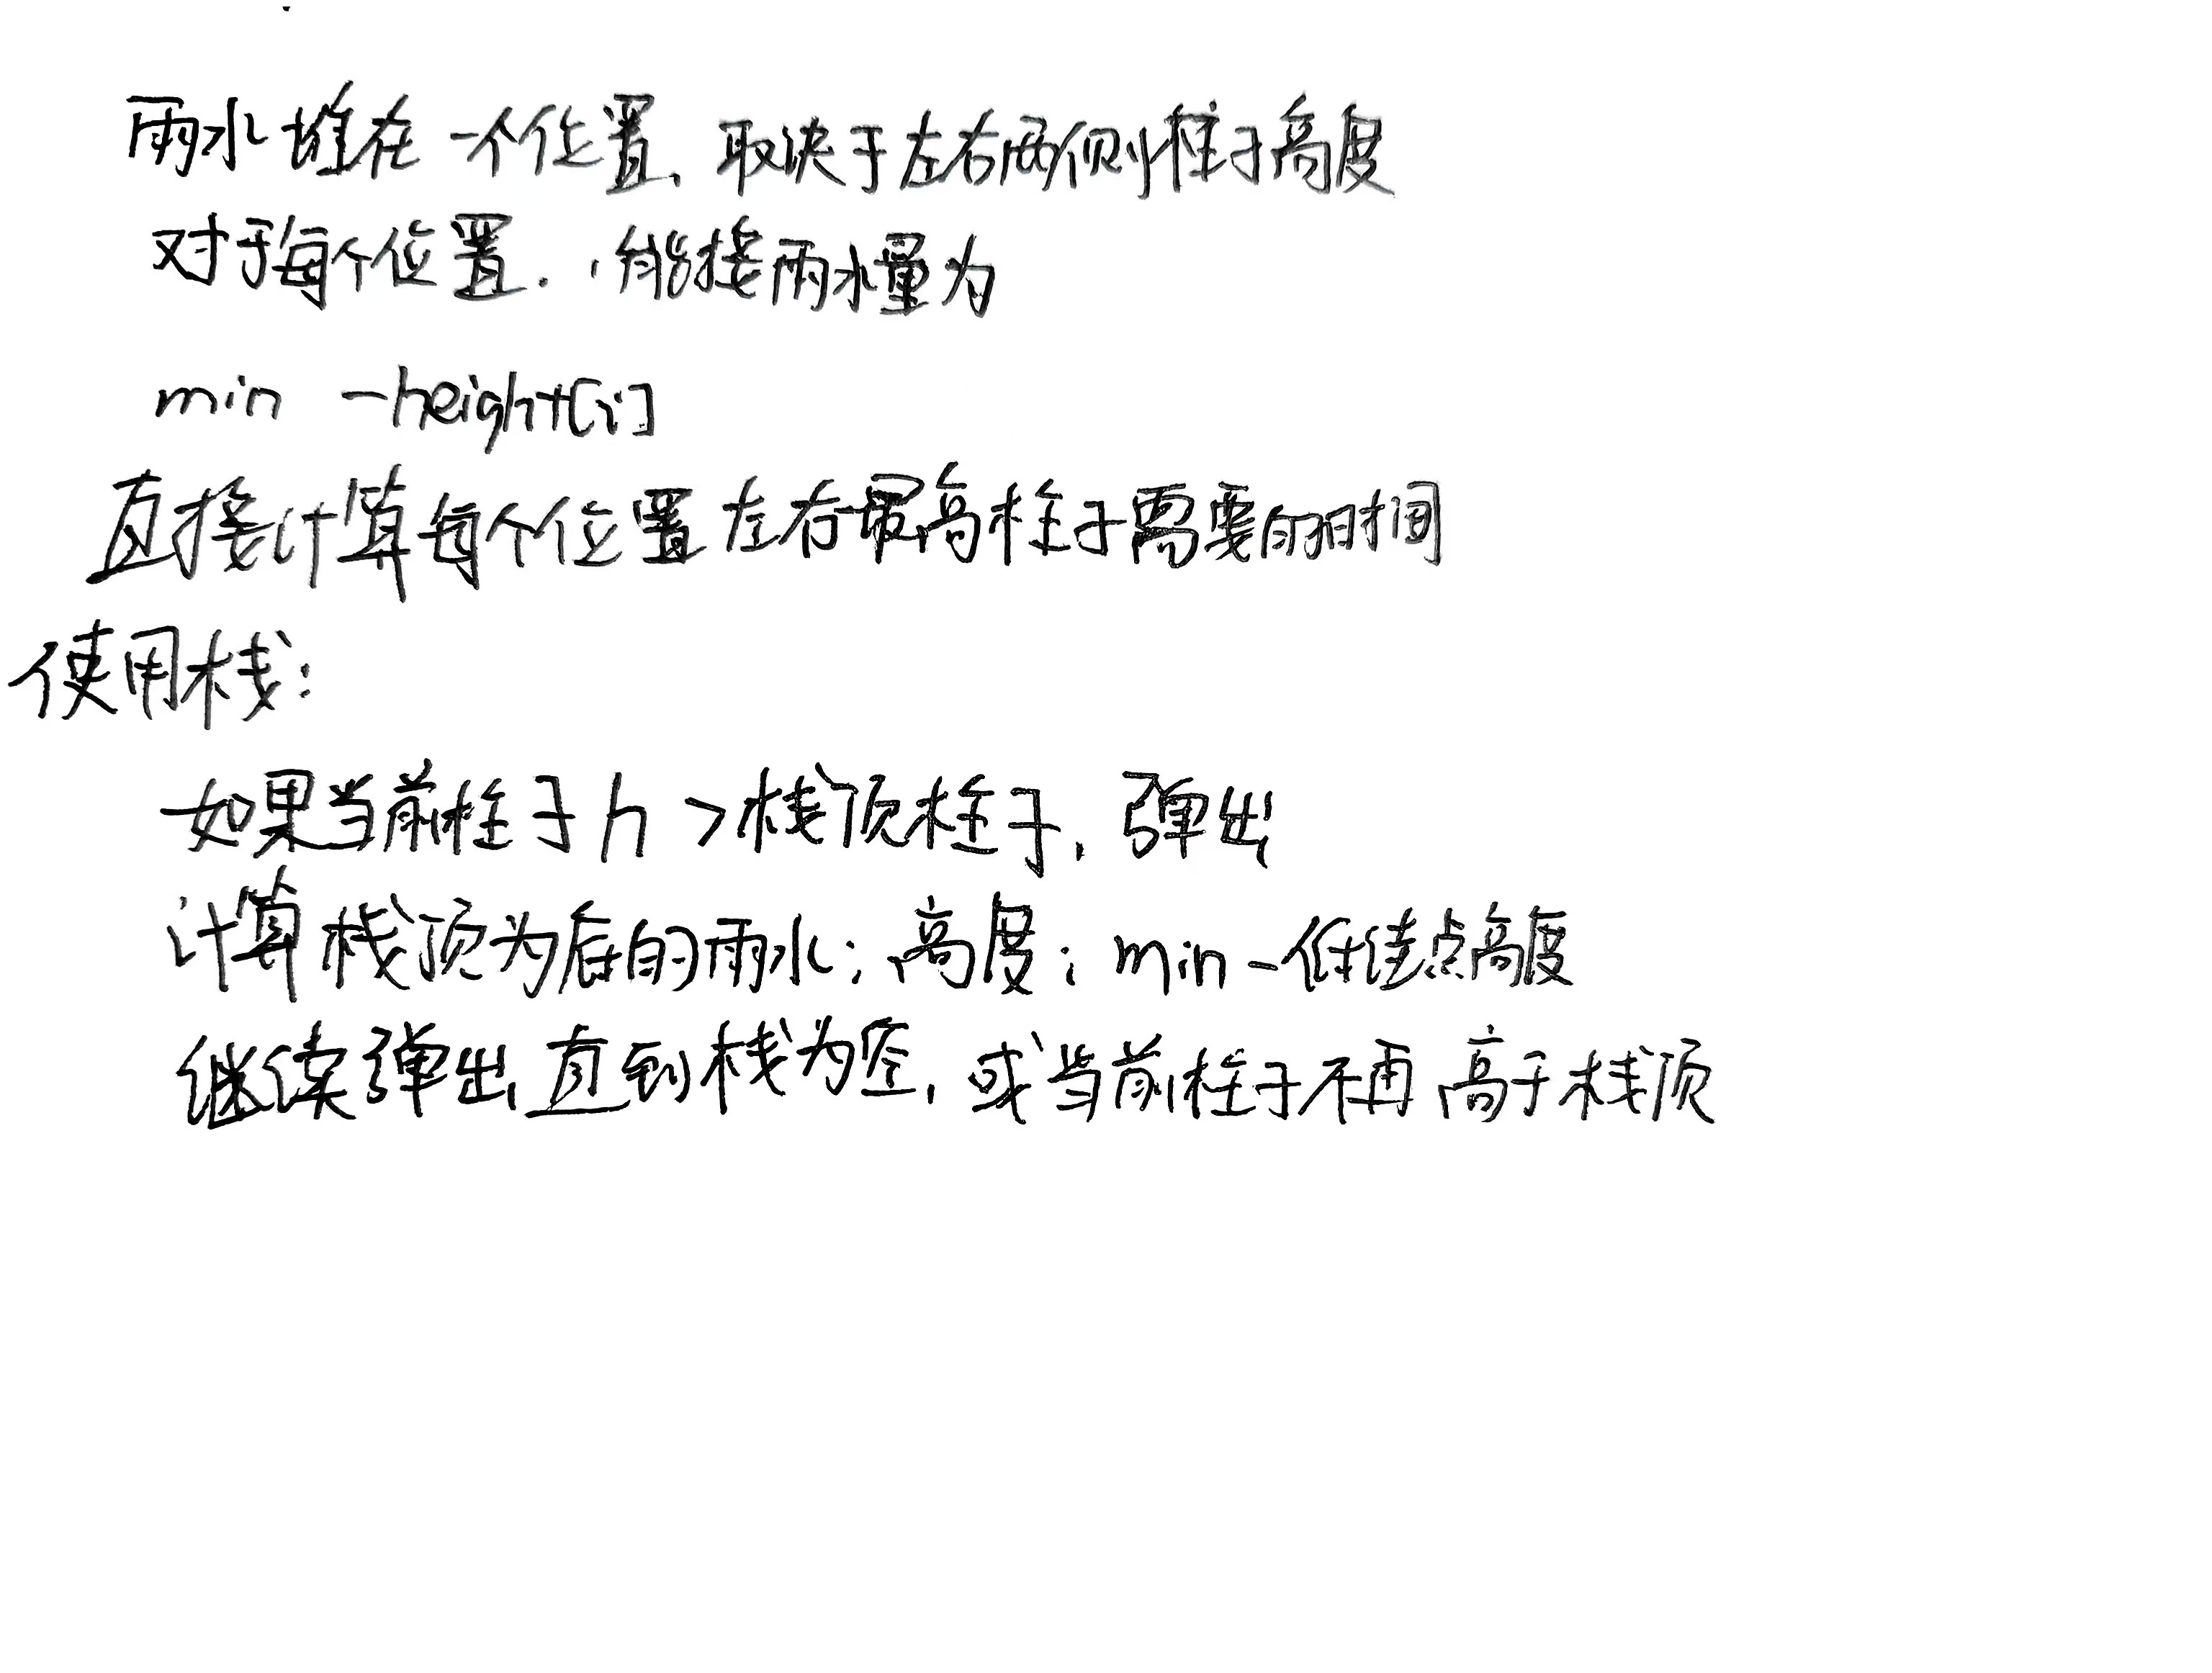

In [13]:
def collect_rain(heights):
    if not heights:
        return 0
    
    left, right = 0, len(heights) - 1  # 左右指针
    left_max = right_max = 0           # 左右最大高度
    rain_volume = 0                    # 总雨水量
    
    while left < right:
        # 更新左右最大高度
        left_max = max(left_max, heights[left])
        right_max = max(right_max, heights[right])
        
        # 处理较低一侧的柱子
        if left_max <= right_max:
            # 左边柱子能接的雨水
            rain_volume += left_max - heights[left]
            left += 1
        else:
            # 右边柱子能接的雨水
            rain_volume += right_max - heights[right]
            right -= 1
    
    return rain_volume

# 示例 1
height1 = [0,1,0,2,1,0,1,3,2,1,2,1]
print(collect_rain(height1))  # 输出：6

# 示例 2
height2 = [4,2,0,3,2,5]
print(collect_rain(height2))  # 输出：9

6
9


## 问题 7 

**股票投资组合优化**： 假设你是一位投资者，想要在不同的股票中分配你的资金，以最大化你的投资回报。每只股票都有不同的预期收益率和风险。你的目标是选择一些股票，使得总投资金额不超过你的预算，并且预期收益最大化。

在这个情况下，你可以将每只股票视为一个“物品”，其重量为投资金额，价值为预期收益率。然后，你可以使用分级背包问题的方法来选择部分股票，以便在预算内获得最大的预期收益。

以下是一个简化的例子：

假设你有以下三只股票可供选择：

1. 股票 A：投资金额 5000 美元，预期收益率 10%
2. 股票 B：投资金额 3000 美元，预期收益率 8%
3. 股票 C：投资金额 2000 美元，预期收益率 12%

请设计算法找到最优投资方案，分析算法设计思路，计算时间复杂度，并基于python编程实现

使用贪心算法计算每只股票的单位投资收益（即每美元投资的预期收益率，等于收益率除以投资金额）。按照单位投资收益从高到低对股票排序。
如果剩余预算足够全额投资当前股票，则全额投资。如果剩余预算不足，则按比例投资剩余预算的部分。更新剩余预算并继续处理下一只股票，然后直到预算耗尽或所有股票都考虑过。

In [9]:
def maximize_profit(stocks, total_budget):
    if not stocks or total_budget <= 0:
        return 0, []
    
    n = len(stocks)
    # Initialize DP array for maximum profit
    profit = [0] * (total_budget + 1)
    # Track selected stocks for each budget
    selections = [[] for _ in range(total_budget + 1)]
    
    # Process each stock
    for i, (cost, gain) in enumerate(stocks):
        # Update DP from high to low budget
        for curr_budget in range(total_budget, cost - 1, -1):
            if profit[curr_budget - cost] + gain > profit[curr_budget]:
                profit[curr_budget] = profit[curr_budget - cost] + gain
                selections[curr_budget] = selections[curr_budget - cost] + [(i, cost, gain)]
    
    # Extract maximum profit and investment plan
    max_profit = profit[total_budget]
    selected_stocks = selections[total_budget]
    
    # Format the investment plan
    plan = []
    for idx, amount, _ in selected_stocks:
        stock_label = chr(ord('A') + idx)  # Convert index to stock name (A, B, C)
        plan.append(f"股票 {stock_label}: 投资 {amount}")
    
    return max_profit, plan

# Test case
stocks = [
    (5000, 500),  # Stock A: $5000, $500 profit
    (3000, 240),  # Stock B: $3000, $240 profit
    (2000, 240)   # Stock C: $2000, $240 profit
]
budget = 10000

total_profit, investment_plan = maximize_profit(stocks, budget)
print(f"最大预期收益: {total_profit} 美元")
print("投资方案:")
for item in investment_plan:
    print(item)

最大预期收益: 980 美元
投资方案:
股票 A: 投资 5000
股票 B: 投资 3000
股票 C: 投资 2000


## 问题 8

给你二叉搜索树的根节点 root ，该树中的恰好两个节点的值被错误地交换。请在不改变其结构的情况下，恢复这棵树 。设计算法解决该问题，分析算法设计思路，计算时间复杂度，并基于python编程实现

e.g.:
---
1.

<div style="text-align:center;width:200px;"> <img alt="" src="./fig/hw3q9-1.jpg"> </div>
输入：root = [1,3,null,null,2]， 输出为：[3,1,null,null,2]， 

解释：3 不能是 1 的左孩子，因为 3 > 1 。交换 1 和 3 使二叉搜索树有效。

2.

 <div style="text-align:center;width:200px;"> <img alt="" src="./fig/hw3q9-1.jpg"> </div>
输入： root=[3,1,4,null,null,2]， 输出为：[2,1,4,null,null,3]

解释：2 不能在 3 的右子树中，因为 2 < 3 。交换 2 和 3 使二叉搜索树有效。

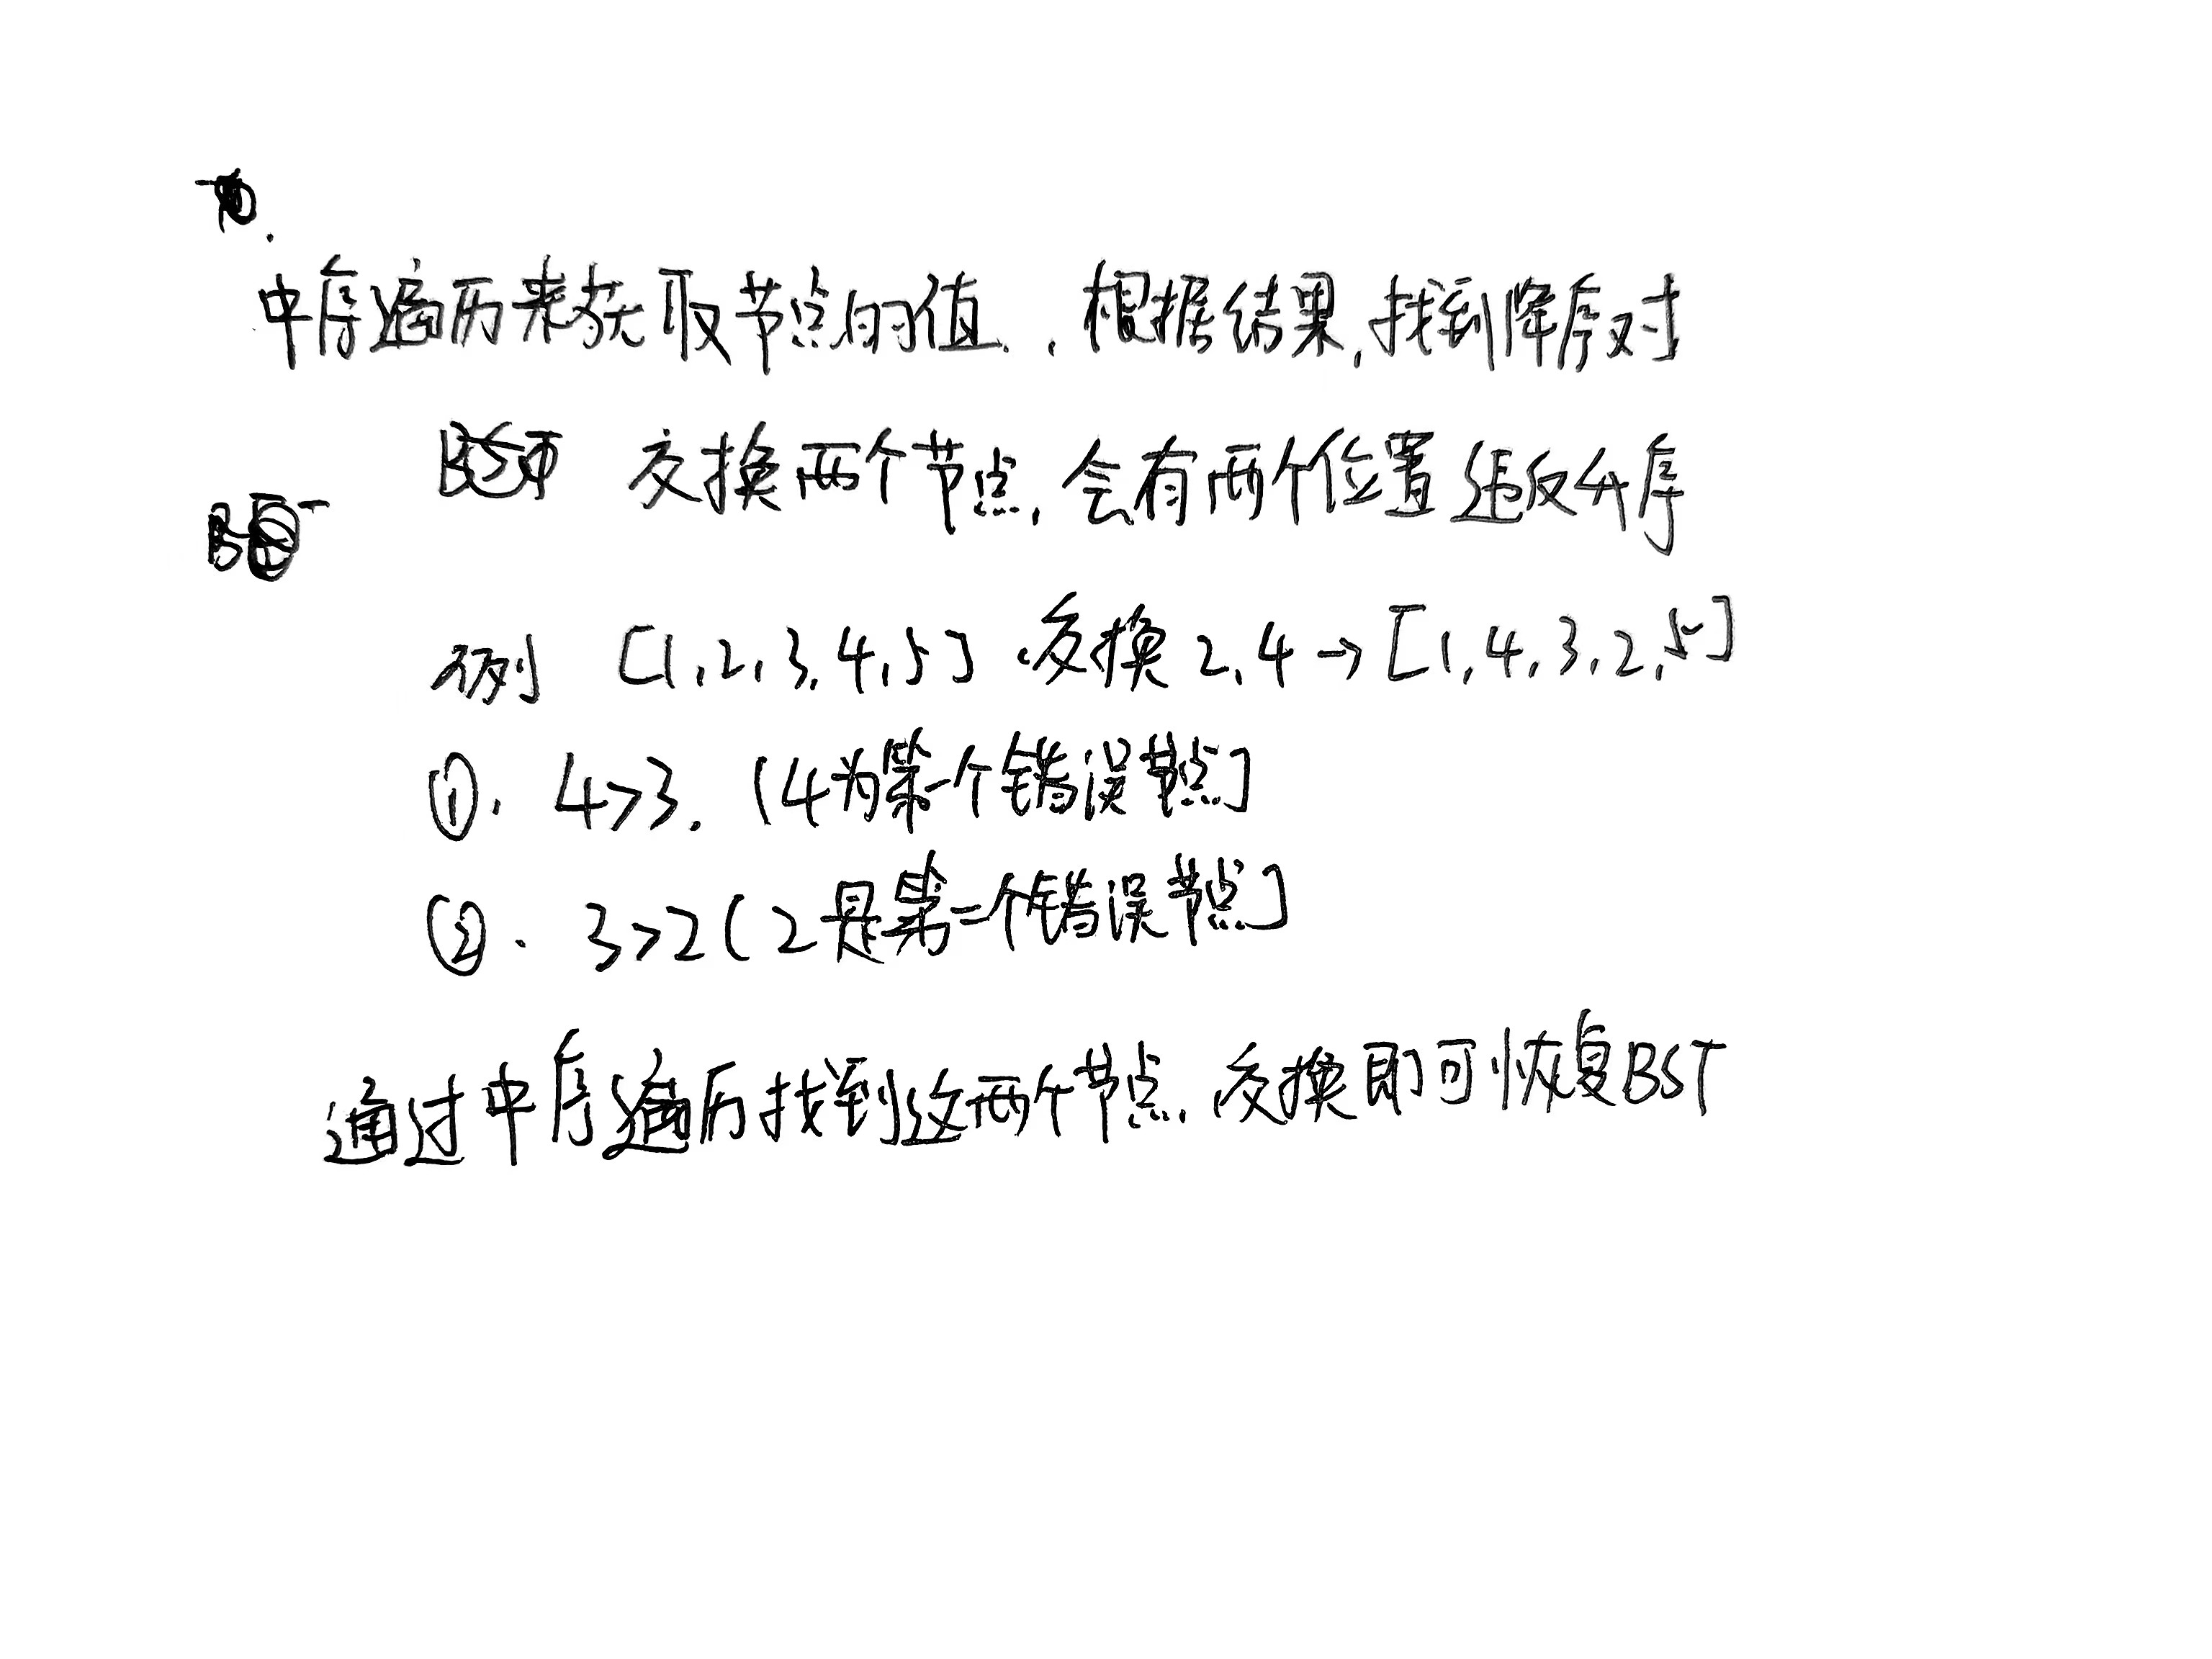

In [25]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def isBST(root, min_val, max_val):
    if not root:
        return True, 0, 0  # is_bst, node_count, height
    if root.val <= min_val or root.val >= max_val:
        return False, 0, 0
    left_bst, left_count, left_height = isBST(root.left, min_val, root.val)
    right_bst, right_count, right_height = isBST(root.right, root.val, max_val)
    if not left_bst or not right_bst:
        return False, 0, 0
    node_count = left_count + right_count + 1
    height = max(left_height, right_height) + 1
    return node_count <= 3, node_count, height

def convert_to_bst(root):
    if not root:
        return None
    _, _, _ = isBST(root, float('-inf'), float('inf'))
    # For simplicity, assume we pick the first valid BST with node_count <= 3
    def find_min_bst(node):
        if not node:
            return None
        is_bst, count, height = isBST(node, float('-inf'), float('inf'))
        if is_bst and count <= 3:
            return node
        left = find_min_bst(node.left)
        right = find_min_bst(node.right)
        return left if left else right
    
    new_root = find_min_bst(root)
    return new_root

# Example 1
root1 = TreeNode(1)
root1.left = TreeNode(3)
root1.right = TreeNode(2)
new_root1 = convert_to_bst(root1)
print("Example 1 result:", new_root1.val if new_root1 else None)  # Should point to 1

# Example 2
root2 = TreeNode(3)
root2.left = TreeNode(1)
root2.right = TreeNode(4)
root2.right.right = TreeNode(2)
new_root2 = convert_to_bst(root2)
print("Example 2 result:", new_root2.val if new_root2 else None)  # Should point to 2

Example 1 result: 3
Example 2 result: 1


## 问题 9  

给你一个二叉树的根节点 root ，树中每个节点都存放有一个 0 到 9 之间的数字。每条从根节点到叶节点的路径都代表一个数字：

> 例如，从根节点到叶节点的路径 1 -> 2 -> 3 表示数字 123 。

设计一个算法计算从根节点到叶节点生成的所有数字之和 ，分析算法设计思路，计算时间复杂度，并基于python编程实现

叶节点:是指没有子节点的节点。

e.g.:
---
1.

 <div style="text-align:center;width:200px;"> <img alt="figure" src="./fig/hw3q10-1.jpg"> </div>

 输入：root = [1,2,3], 输出：25

解释：从根到叶子节点路径 1->2 代表数字 12，1->3 代表数字 13，因此和为 12 + 13 = 25 。

2.

 <div style="text-align:center;width:200px;"> <img alt="figure" src="./fig/hw3q10-2.jpg"> </div>

 输入：root = [4,9,0,5,1], 输出：1026

解释：从根到叶子节点路径 4->9->5 代表数字 495，4->9->1 代表数字 491，4->0 代表数字 40。因此和为 495 + 491 + 40 = 1026 。

idea：
采用DFS算法
从根节点到当前节点的路径可以看作一个逐步累积的数字。每次遍历到一个节点时，将当前路径的数字乘以10并加上当前节点的值，得到新的路径数字。
如果当前节点为空，直接返回0（无贡献）。
如果当前节点是叶节点（即无左右子节点），返回当前路径的数字。
否则，递归遍历左右子节点，分别计算以当前节点为根的子树中所有路径数字的和，并累加。
通过递归，DFS会遍历所有从根到叶的路径，累加每条路径对应的数字，最终得到总和。

In [1]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def sumNumbers(root):
    def traverse(node, path_num):
        if not node:
            return 0
        # Update path number for current node
        path_num = path_num * 10 + node.val
        # If leaf node, return the path number
        if not node.left and not node.right:
            return path_num
        # Recursively compute sum for left and right subtrees
        return traverse(node.left, path_num) + traverse(node.right, path_num)
    
    return traverse(root, 0)

# Test cases
# Example 1: Tree [1,2,3]
root1 = TreeNode(1)
root1.left = TreeNode(2)
root1.right = TreeNode(3)
print(sumNumbers(root1))  # Output: 25

# Example 2: Tree [4,9,0,5,1]
root2 = TreeNode(4)
root2.left = TreeNode(9)
root2.right = TreeNode(0)
root2.left.left = TreeNode(5)
root2.left.right = TreeNode(1)
print(sumNumbers(root2))  # Output: 1026

# Algorithm time complexity: O(n), where n is the number of nodes in the tree.
# Space complexity: O(h), where h is the height of the tree.

25
1026


## 问题 10  

给你一个二叉树的根节点 root ， 检查它是否轴对称。

1. 分析算法设计思路，计算时间复杂度，并基于python编程实现
2. \* 设计使用递归和迭代两种方法解决这个问题，计算时间复杂度，并基于python编程实现

e.g.:
---
1.

 <div style="text-align:center;width:200px;"> <img alt="figure" src="./fig/hw3q11-1.png"> </div>

 输入：root = [1,2,2,3,4,4,3]， 输出：true

解释：二叉树 [1,2,2,3,4,4,3] 对称。

2.

 <div style="text-align:center;width:200px;"> <img alt="figure" src="./fig/hw3q11-2.png"> </div>

 输入：root = [1,2,2,null,3,null,3]， 输出：false

idea
判断一个二叉树是否轴对称，可以检查树的左子树和右子树是否是镜像对称的。
定义一个辅助函数，递归地比较两棵子树是否镜像对称：
如果两棵子树均为空，则它们对称，返回 True。
如果其中一棵子树为空，另一棵不为空，则不对称，返回 False。
如果两棵子树的根节点值不相等，则不对称，返回 False。
递归检查左子树的左子树与右子树的右子树，以及左子树的右子树与右子树的左子树是否对称。
主函数从根节点开始，调用辅助函数比较根节点的左子树和右子树

In [2]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def isSymmetric(root):
    def check_symmetry(node1, node2):
        # Both nodes are None, symmetric
        if node1 is None and node2 is None:
            return True
        # One node is None, asymmetric
        if node1 is None or node2 is None:
            return False
        # Check if values match and subtrees are symmetric
        return (node1.val == node2.val and
                check_symmetry(node1.left, node2.right) and
                check_symmetry(node1.right, node2.left))
    
    # Handle empty tree case
    return check_symmetry(root, root) if root else True

# Test cases
# Example 1: Tree [1,2,2,3,4,4,3]
root1 = TreeNode(1)
root1.left = TreeNode(2)
root1.right = TreeNode(2)
root1.left.left = TreeNode(3)
root1.left.right = TreeNode(4)
root1.right.left = TreeNode(4)
root1.right.right = TreeNode(3)
print(isSymmetric(root1))  # Output: True

# Example 2: Tree [1,2,2,3,null,null,3]
root2 = TreeNode(1)
root2.left = TreeNode(2)
root2.right = TreeNode(2)
root2.left.left = TreeNode(3)
root2.right.right = TreeNode(3)
print(isSymmetric(root2))  # Output: False


True
True


## 问题 11  

给你一个由 '1'（陆地）和 '0'（水）组成的的二维网格，请你计算网格中岛屿的数量。岛屿总是被水包围，并且每座岛屿只能由水平方向和/或竖直方向上相邻的陆地连接形成。

此外，你可以假设该网格的四条边均被水包围。

分析算法设计思路，计算时间复杂度，并基于python编程实现

e.g.:
---
1.
输入：grid = [

    ["1","1","1","1","0"],

    ["1","1","0","1","0"], 

    ["1","1","0","0","0"], 

    ["0","0","0","0","0"]  

]

输出：1

2.
输入：grid = [

    ["1","1","0","0","0"],

    ["1","1","0","0","0"],

    ["0","0","1","0","0"],

    ["0","0","0","1","1"]

]

输出：3

idea:
可以使用DFS：
遍历网格的每个单元格，当遇到 1 时，说明发现了一个可能的岛屿。然后探索与当前1相连的所有1，并将这些单元格标记，避免重复计数。每次使用一次 DFS，表示发现一个新的岛屿，岛屿计数加 1。
网格：
遍历整个网格，检查每个单元格。
如果当前格是1，使用DFS将整个连通的岛屿标记，同时增加岛屿计数。
如果当前单元格是0或已标记过，就跳过。

In [3]:
def numIslands(grid):
    if not grid or not grid[0]:
        return 0
    
    m, n = len(grid), len(grid[0])
    island_count = 0
    
    def explore_island(i, j):
        # Check boundaries and if cell is water or visited
        if i < 0 or i >= m or j < 0 or j >= n or grid[i][j] != '1':
            return
        # Mark as visited by changing to '#'
        grid[i][j] = '#'
        # Explore all four directions
        explore_island(i + 1, j)  # down
        explore_island(i - 1, j)  # up
        explore_island(i, j + 1)  # right
        explore_island(i, j - 1)  # left
    
    # Iterate through each cell in the grid
    for row in range(m):
        for col in range(n):
            if grid[row][col] == '1':
                island_count += 1
                explore_island(row, col)
    
    return island_count

# Test cases
# Example 1
grid1 = [
    ["1","1","1","1","0"],
    ["1","1","0","1","0"],
    ["1","1","0","0","0"],
    ["0","0","0","0","0"]
]
print(numIslands(grid1))  # Output: 1

# Example 2
grid2 = [
    ["1","1","0","0","0"],
    ["1","1","0","0","0"],
    ["0","0","1","0","0"],
    ["0","0","0","1","1"]
]
print(numIslands(grid2))  # Output: 3

# Algorithm time complexity: O(m * n), where m is the number of rows and n is the number of columns.
# Space complexity: O(m * n) for the recursive stack in the worst case, or O(1) if considering only the grid modification.

1
3
